#### Importações

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.linear_model import Ridge
import xgboost as xgb


In [63]:
path = "../ailerons.csv"
data = pd.read_csv(path)
data


ClimbRate  Sgz     P     Q  CurPitch  CurRoll  AbsRoll  DiffClb  \
0            -17   -6 -0.03  0.14      0.59     -0.5      -11       -9   
1           -791   15 -0.28 -0.34      1.11      0.9      -10       27   
2            -46   48 -0.42  0.07      0.57      0.6       -5       -8   
3            496   -5 -0.21 -0.04      0.03     -0.5       -7        6   
4           -124   16 -0.02  0.05      0.61     -0.2       -9       -3   
...          ...  ...   ...   ...       ...      ...      ...      ...   
13745        -53  -13 -0.07  0.02      0.58     -2.3      -15       12   
13746          1    4 -0.11 -0.07      0.47      0.8       -5        8   
13747        425  -14  0.40  0.07      0.41     -2.1      -16       12   
13748        102  -10 -0.19  0.08      1.30      0.5      -10       -3   
13749       -165   52  0.08  0.42      1.07     -1.6      -22      -15   

       DiffRollRate  DiffDiffClb  ...  DiffSeTime8  DiffSeTime9  DiffSeTime10  \
0             0.015         -0.2  ...          0.0        0.000           0.0   
1            -0.002          4.7  ...          0.0        0.000           0.0   
2            -0.008          0.0  ...          0.0        0.000           0.0   
3            -0.002         -0.1  ...          0.0        0.000           0.0   
4             0.000          0.0  ...          0.0        0.000           0.0   
...             ...          ...  ...          ...          ...           ...   
13745         0.022         -0.8  ...          0.0        0.000           0.0   
13746        -0.003         -0.2  ...          0.0        0.000           0.0   
13747         0.031         -0.7  ...          0.0        0.001           0.0   
13748        -0.003         -0.2  ...          0.0        0.000           0.0   
13749         0.007          0.0  ...          0.0        0.000           0.0   

       DiffSeTime11  DiffSeTime12  DiffSeTime13  DiffSeTime14  Alpha     Se  \
0             0.000           0.0         0.000           0.0    0.6  0.021   
1             0.000           0.0         0.000           0.0    0.4  0.013   
2             0.000           0.0         0.000           0.0    0.5  0.019   
3             0.001           0.0         0.001           0.0    0.5  0.017   
4             0.000           0.0         0.000           0.0    0.5  0.018   
...             ...           ...           ...           ...    ...    ...   
13745         0.000           0.0        -0.001           0.0    0.5  0.019   
13746         0.000           0.0         0.000           0.0    0.5  0.016   
13747         0.000           0.0         0.001           0.0    0.9  0.032   
13748         0.000           0.0         0.000           0.0    1.4  0.051   
13749         0.000           0.0         0.000           0.0    0.9  0.034   

         Goal  
0     -0.0008  
1     -0.0009  
2     -0.0005  
3     -0.0005  
4     -0.0006  
...       ...  
13745 -0.0007  
13746 -0.0004  
13747 -0.0015  
13748 -0.0015  
13749 -0.0018  

[13750 rows x 41 columns]

#### I

In [64]:
selected_columns = ['Alpha', 'Se'] + [f'SeTime{i}' for i in range(1, 15)]
correlation_matrix = data[selected_columns].corr()

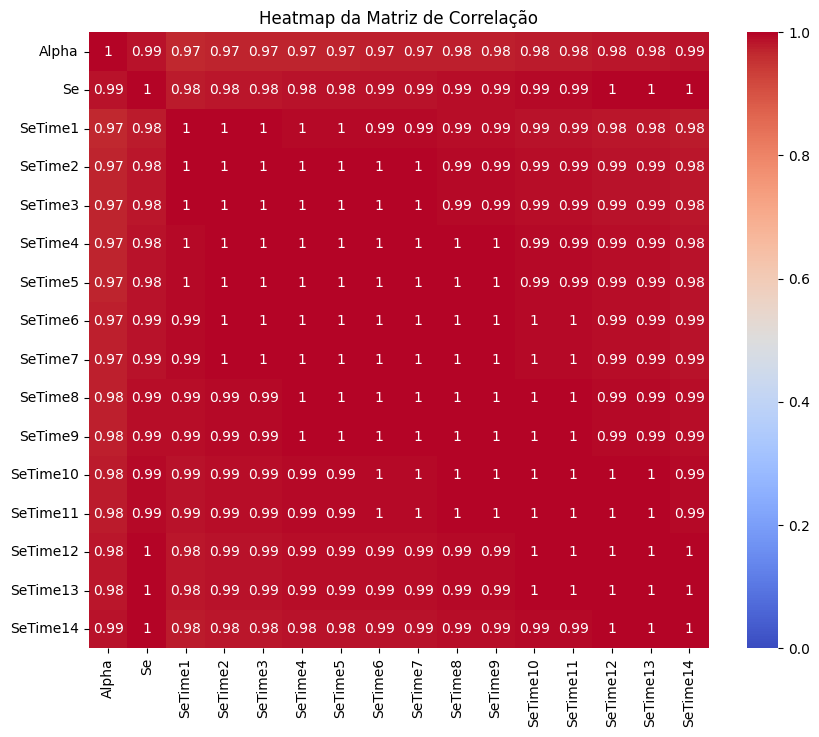

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin=0, vmax=1)
plt.title('Heatmap da Matriz de Correlação')
plt.show()

#### II

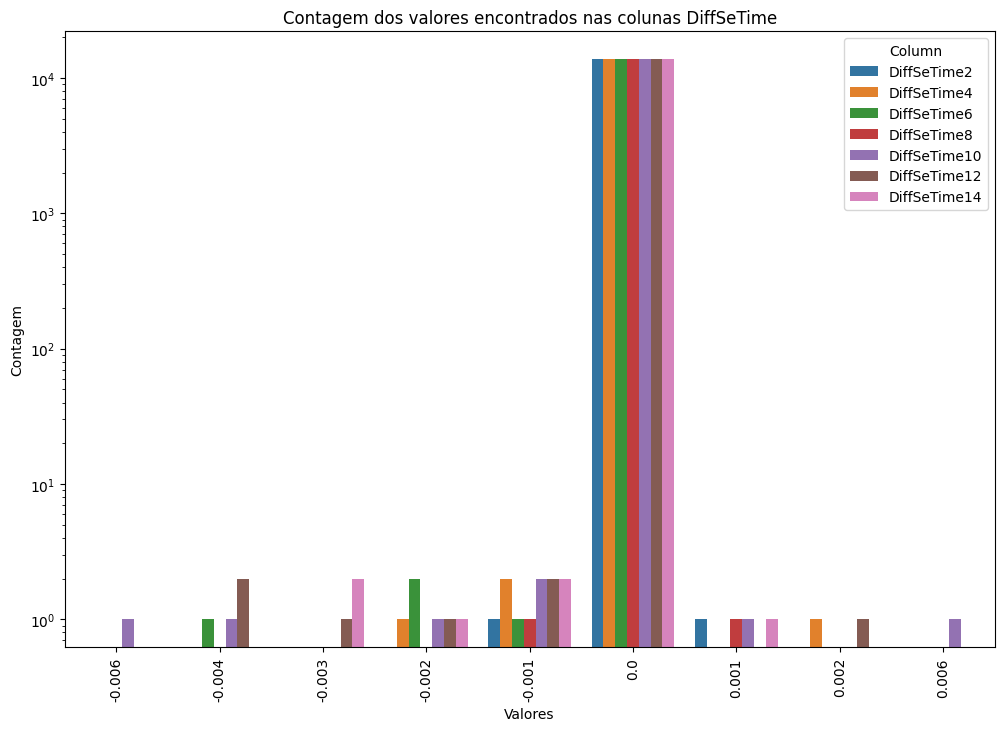

In [66]:
selected_columns = [f'DiffSeTime{2*i}' for i in range(1, 8)]
count_df = pd.DataFrame()

for col in selected_columns:
    value_counts = data[col].value_counts(dropna=False)
    count_df = pd.concat([count_df, value_counts.rename(col)], axis=1)

count_df = count_df.reset_index().rename(columns={'index': 'Value'})

melted_df = count_df.melt(id_vars=['Value'], var_name='Column', value_name='Count')

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Value', y='Count', hue='Column', data=melted_df)
plt.title('Contagem dos valores encontrados nas colunas DiffSeTime')
plt.xlabel('Valores')
plt.ylabel('Contagem')
plt.legend(title='Column')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [67]:
count_df

Value  DiffSeTime2  DiffSeTime4  DiffSeTime6  DiffSeTime8  DiffSeTime10  \
0  0.000      13748.0      13746.0      13746.0      13748.0       13743.0   
1 -0.001          1.0          2.0          1.0          1.0           2.0   
2  0.001          1.0          NaN          NaN          1.0           1.0   
3  0.002          NaN          1.0          NaN          NaN           NaN   
4 -0.002          NaN          1.0          2.0          NaN           1.0   
5 -0.004          NaN          NaN          1.0          NaN           1.0   
6 -0.006          NaN          NaN          NaN          NaN           1.0   
7  0.006          NaN          NaN          NaN          NaN           1.0   
8 -0.003          NaN          NaN          NaN          NaN           NaN   

   DiffSeTime12  DiffSeTime14  
0       13743.0       13744.0  
1           2.0           2.0  
2           NaN           1.0  
3           1.0           NaN  
4           1.0           1.0  
5           2.0           NaN  
6           NaN           NaN  
7           NaN           NaN  
8           1.0           2.0

#### III

In [68]:
var_to_keep = ['ClimbRate', 'Sgz', 'P', 'Q', 'CurPitch', 'CurRoll', 'AbsRoll', 'DiffClb', 'DiffRollRate', 'DiffDiffClb', 
           'DiffSeTime1', 'DiffSeTime3', 'DiffSeTime5', 'DiffSeTime7', 'DiffSeTime9', 'DiffSeTime11', 'DiffSeTime13', 'Alpha', 'Se', 'Goal']

In [69]:
data_analysis = data[var_to_keep]

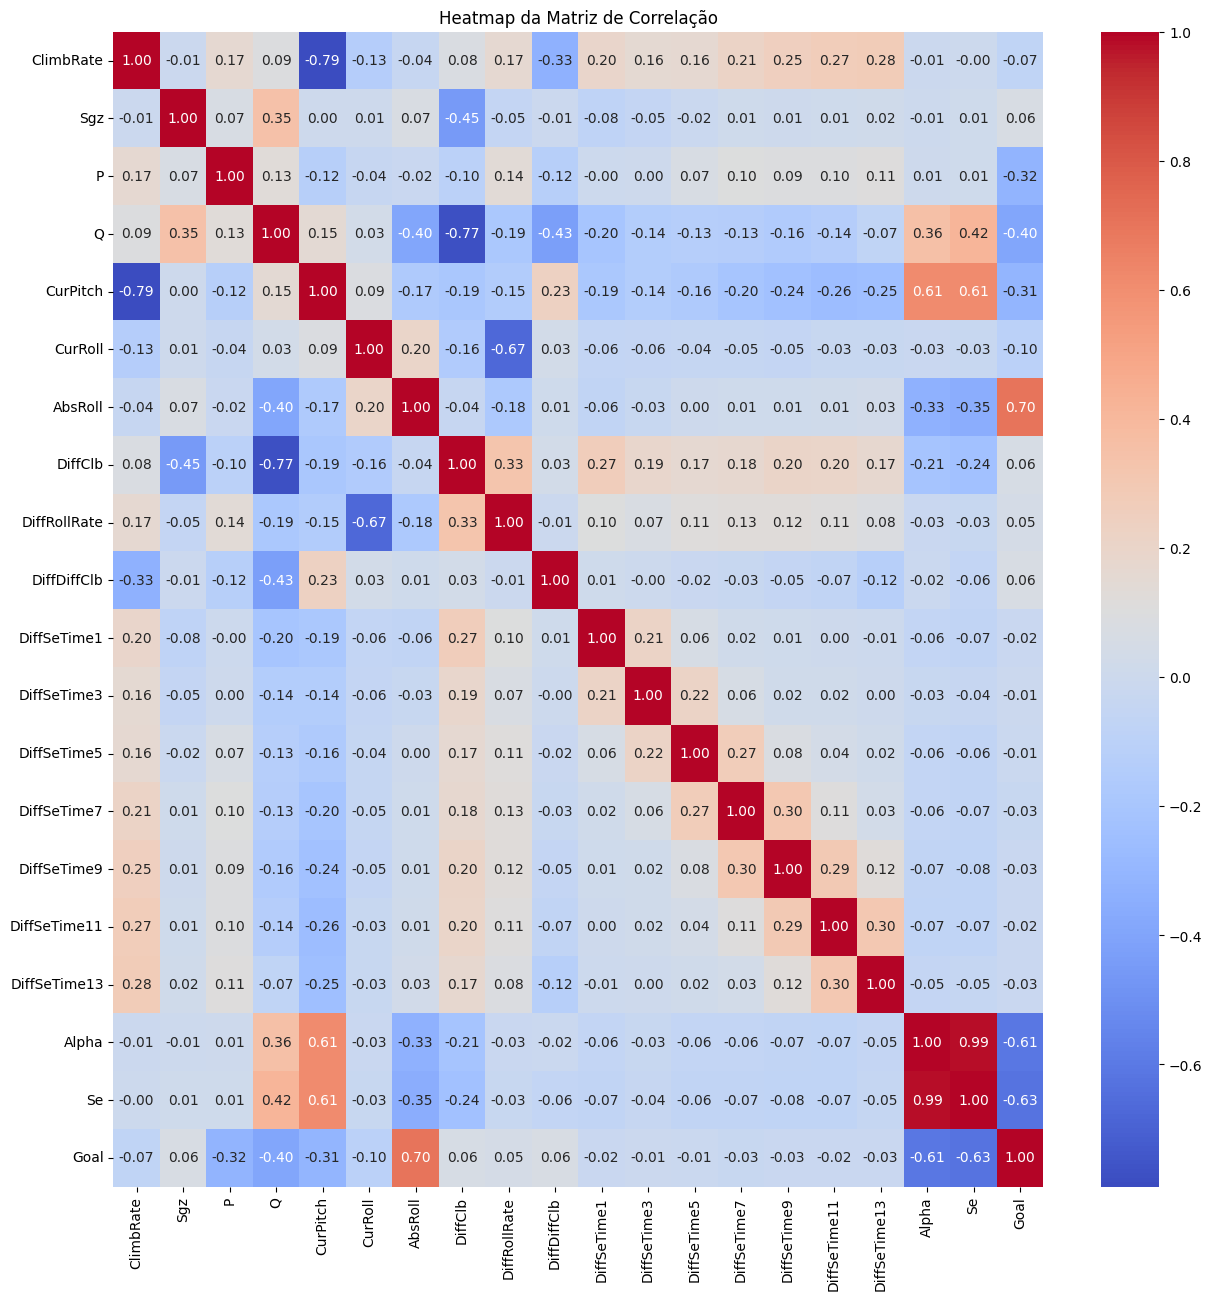

In [70]:
correlation_matrix = data_analysis.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot = True,fmt=".2f", cmap='coolwarm')
plt.title('Heatmap da Matriz de Correlação')
plt.show()

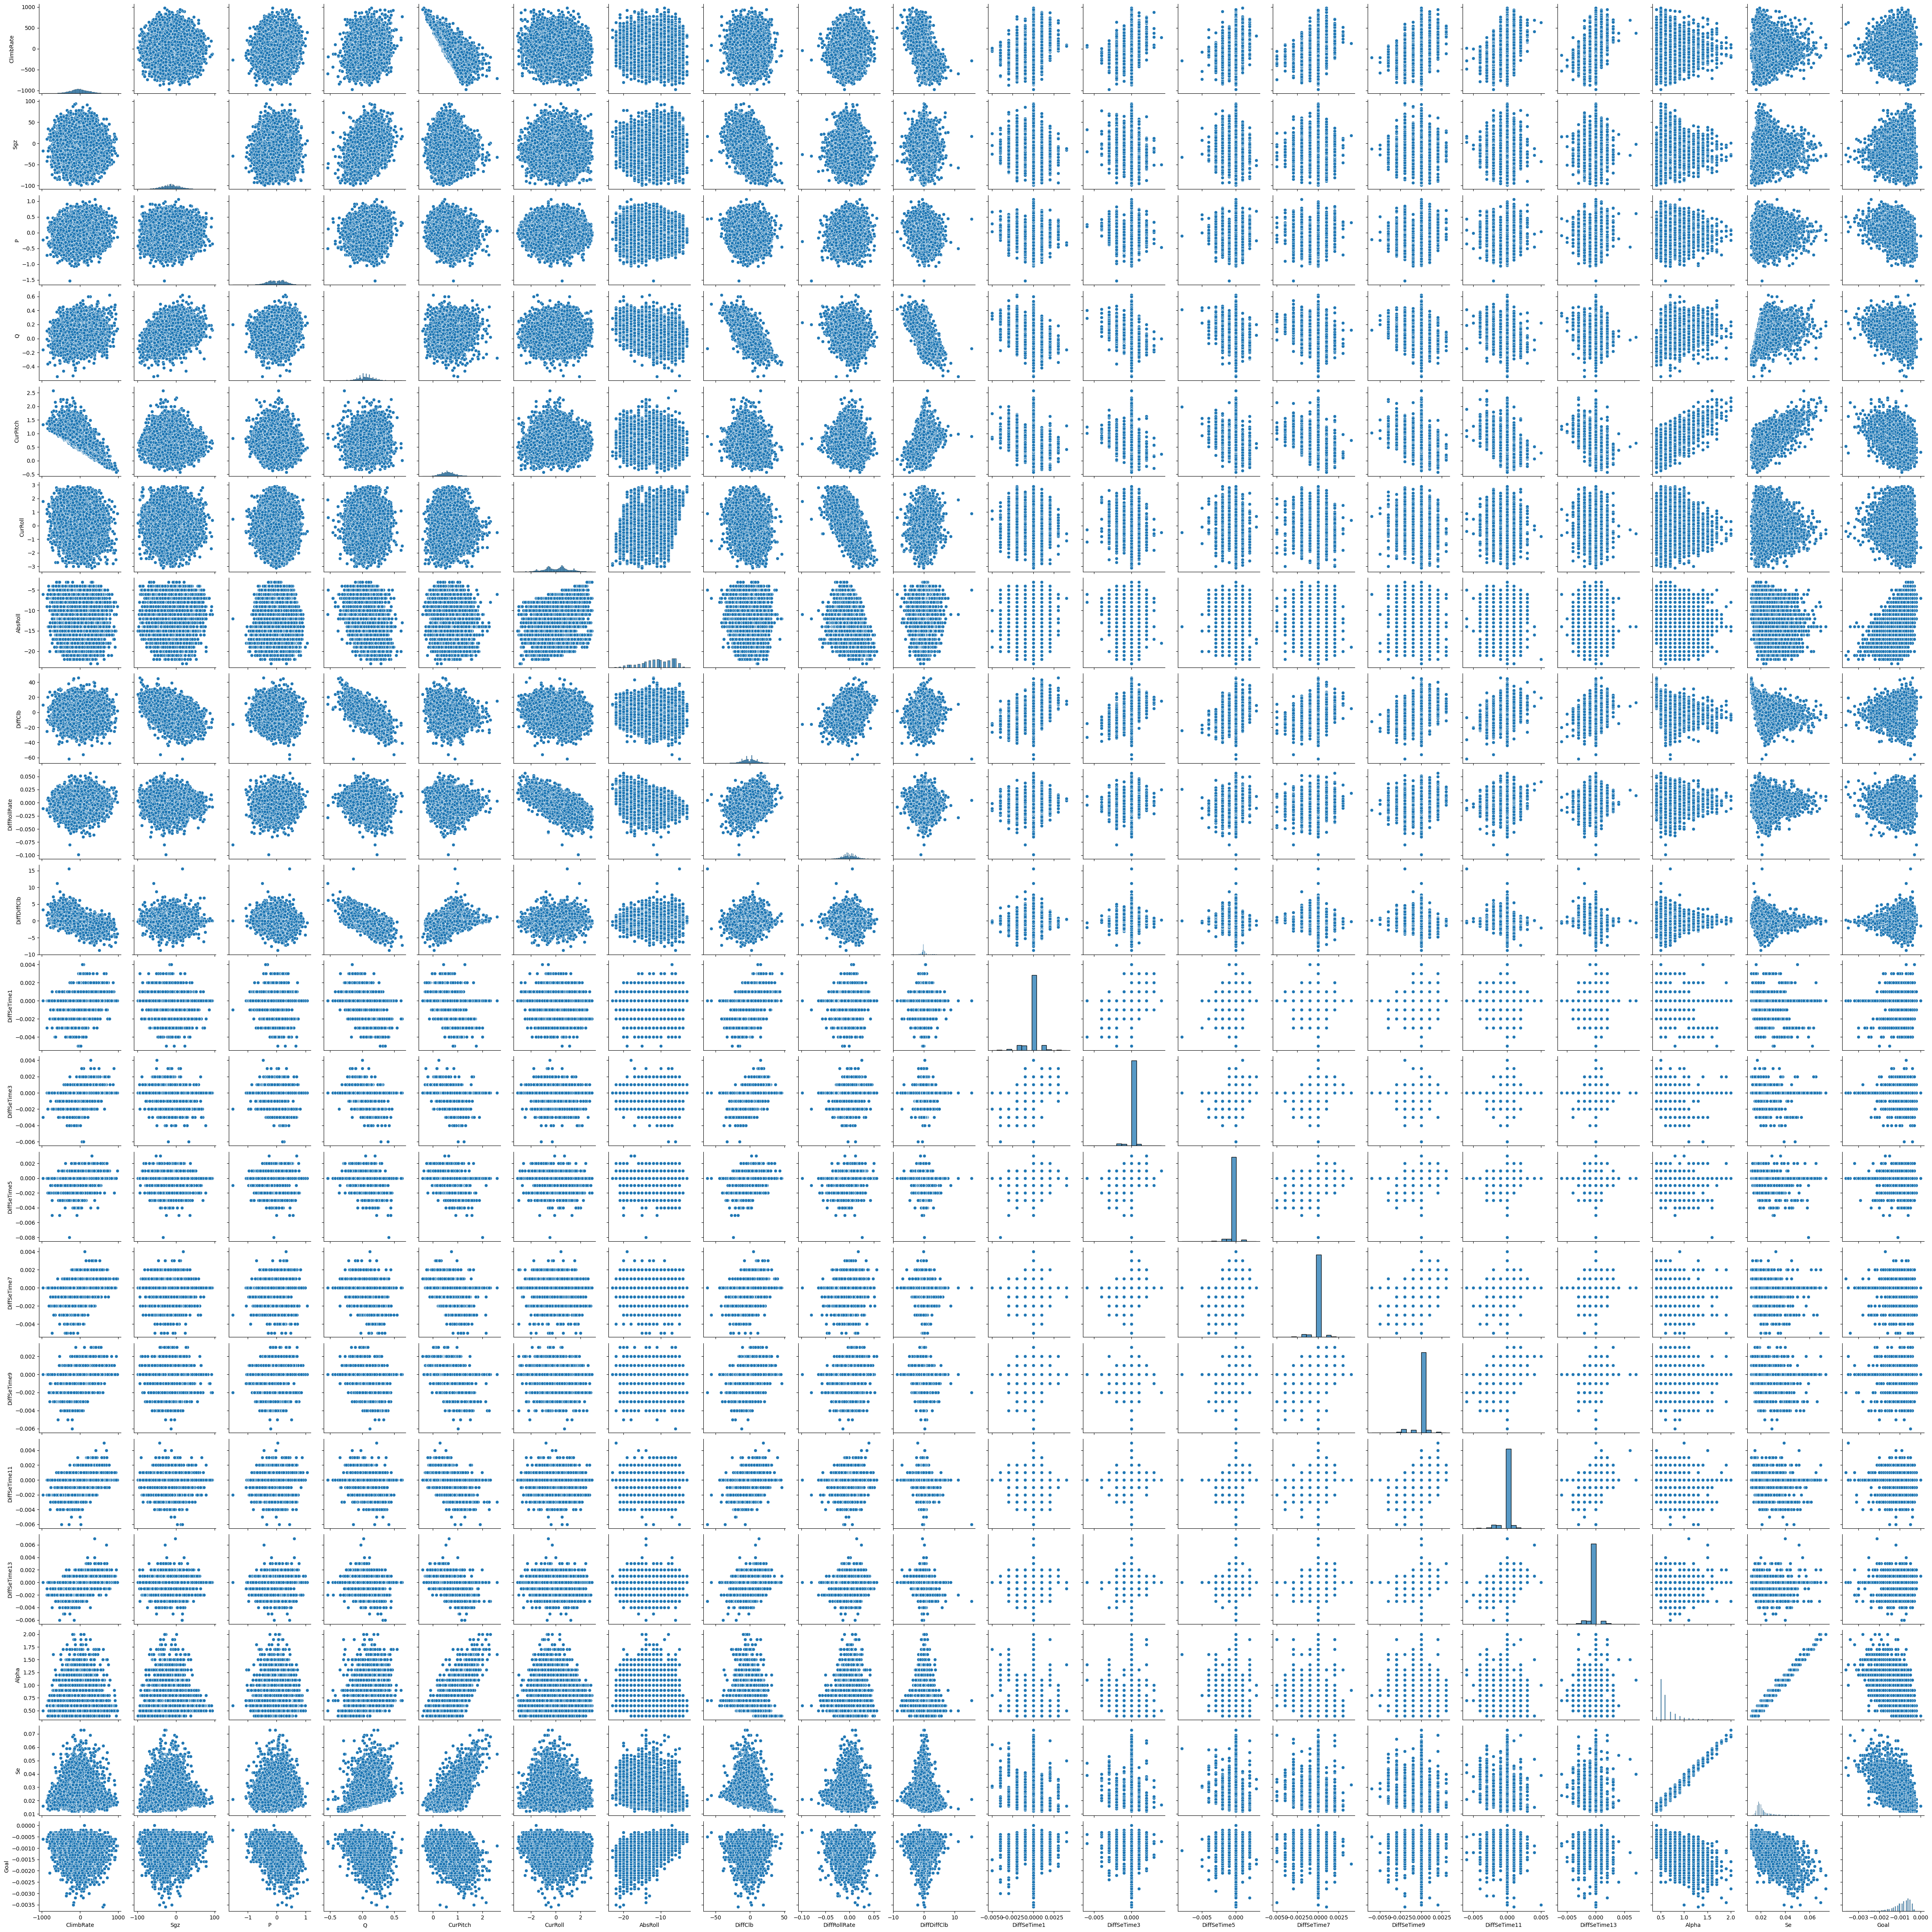

In [71]:
sns.pairplot(data_analysis)
plt.show()

#### IV

In [72]:
median_goal = data_analysis['Goal'].median()

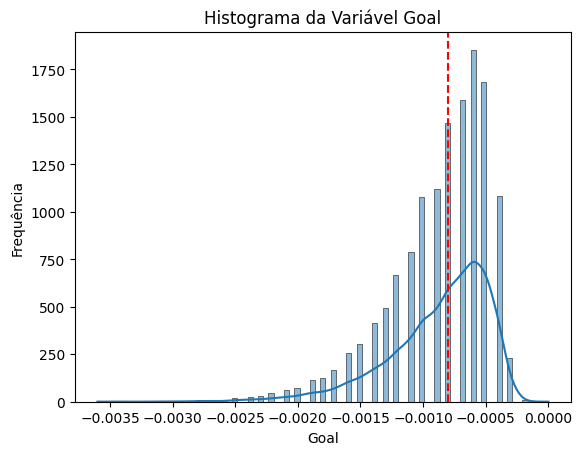

In [73]:
sns.histplot(data_analysis['Goal'], kde=True)
plt.axvline(median_goal, color='red', linestyle='--', label=f'Mediana = {median_goal:.2f}')
plt.title('Histograma da Variável Goal')
plt.xlabel('Goal')
plt.ylabel('Frequência')
plt.show()

#### V

In [74]:
mean_goal = data_analysis['Goal'].mean()

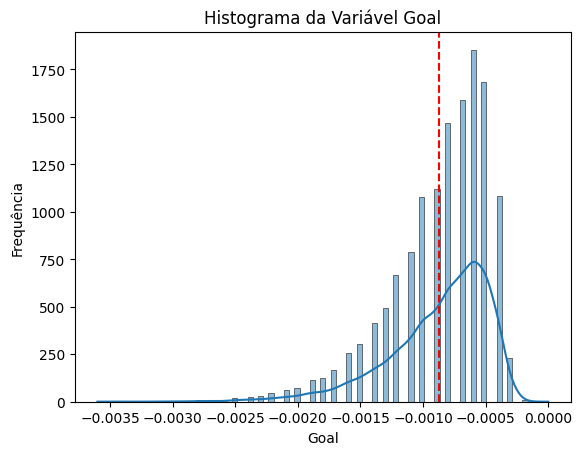

In [75]:
sns.histplot(data_analysis['Goal'], kde=True)
plt.axvline(mean_goal, color='red', linestyle='--', label=f'Mediana = {mean_goal:.2f}')
plt.title('Histograma da Variável Goal')
plt.xlabel('Goal')
plt.ylabel('Frequência')
plt.show()

#### Modelos

In [76]:
data = data_analysis

##### Regressão linear

In [77]:
X = data.drop('Goal', axis=1) 
y = data['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Model': ['Regressão linear'],
    'MSE': [mse],
    'MAE': [mae],
    'RMSE': [rmse],
    'R-squared (R²)': [r2]
})

metrics_df

Model           MSE       MAE      RMSE  R-squared (R²)
0  Regressão linear  3.015932e-08  0.000129  0.000174        0.827429

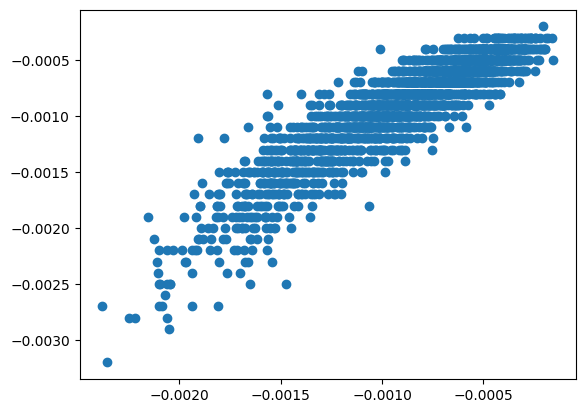

In [78]:
plt.scatter(y_pred,y_test)

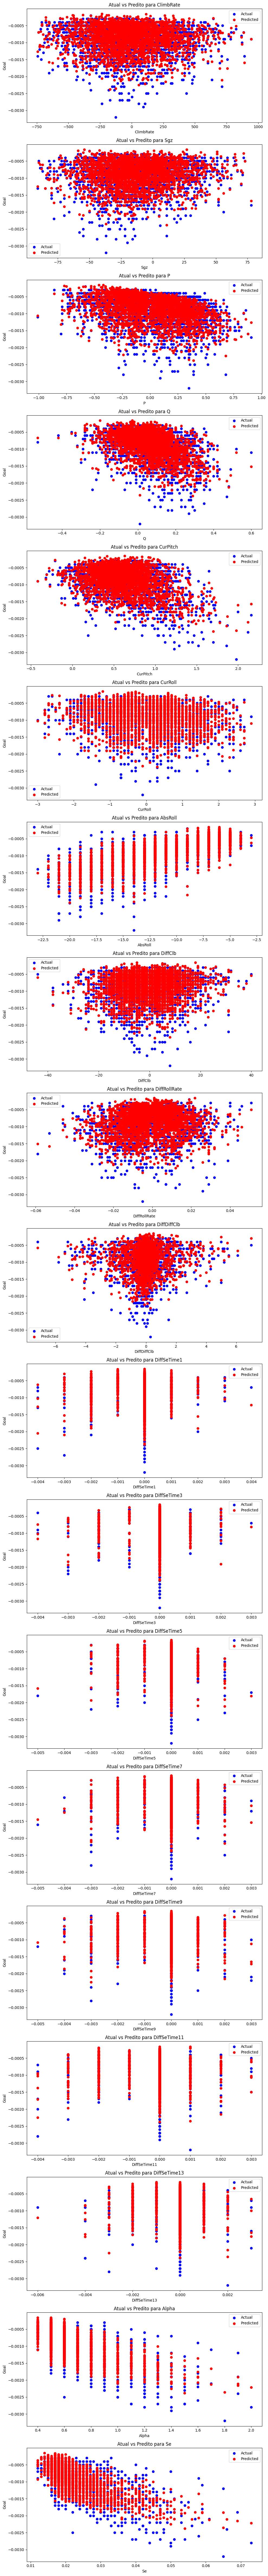

In [79]:
num_features = len(X.columns)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

for i, feature in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X_test[feature], y_test, color='blue', label='Actual')
    ax.scatter(X_test[feature], y_pred, color='red', label='Predicted')
    ax.set_xlabel(feature)
    ax.set_ylabel('Goal')
    ax.set_title(f'Atual vs Predito para {feature}')
    ax.legend()

plt.tight_layout()
plt.show()

In [80]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

conf = model.conf_int()
conf.columns = ['Lower Bound', 'Upper Bound']

print("Intervalo de confiança dos coeficientes:")
print(conf)

Intervalo de confiança dos coeficientes:
               Lower Bound   Upper Bound
const         3.263756e-04  3.573016e-04
ClimbRate     1.254342e-07  3.668911e-07
Sgz           8.252274e-08  3.474094e-07
P            -4.362747e-04 -4.161312e-04
Q            -1.171325e-04  1.194501e-04
CurPitch      1.466709e-04  4.003732e-04
CurRoll      -9.052656e-05 -8.228571e-05
AbsRoll       5.631329e-05  5.924649e-05
DiffClb      -4.575397e-06 -2.546736e-06
DiffRollRate  2.216136e-03  2.857708e-03
DiffDiffClb  -6.102582e-06  4.801155e-06
DiffSeTime1  -1.006182e-02 -9.272423e-04
DiffSeTime3  -6.599556e-03  7.056551e-03
DiffSeTime5  -1.957210e-02 -6.539687e-03
DiffSeTime7  -2.144968e-02 -9.925433e-03
DiffSeTime9  -2.162520e-02 -1.113260e-02
DiffSeTime11 -1.486290e-02 -4.707473e-03
DiffSeTime13 -1.467319e-02 -4.342578e-03
Alpha        -2.090311e-04 -1.395975e-05
Se           -3.489927e-02 -2.624738e-02


In [81]:
non_significant_vars = conf[(conf['Lower Bound'] <= 0) & (conf['Upper Bound'] >= 0)].index
print("\nVariáveis com Coeficientes Não Significativos:")
print(non_significant_vars)

significant_vars = [var for var in X.columns if var not in non_significant_vars]
X_significant = X[significant_vars]

print("\nVariáveis Significativas Selecionadas:")
print(significant_vars)


Variáveis com Coeficientes Não Significativos:
Index(['Q', 'DiffDiffClb', 'DiffSeTime3'], dtype='object')

Variáveis Significativas Selecionadas:
['const', 'ClimbRate', 'Sgz', 'P', 'CurPitch', 'CurRoll', 'AbsRoll', 'DiffClb', 'DiffRollRate', 'DiffSeTime1', 'DiffSeTime5', 'DiffSeTime7', 'DiffSeTime9', 'DiffSeTime11', 'DiffSeTime13', 'Alpha', 'Se']


In [82]:
significant_vars = [var for var in data.columns if var not in non_significant_vars]

X = data[significant_vars]
y = data['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

significant_metrics_df = pd.DataFrame({
    'Model': ['Regressão linear regularizada'],
    'MSE': [mse],
    'MAE': [mae],
    'RMSE': [rmse],
    'R-squared (R²)': [r2]
})
metrics_df = pd.concat([metrics_df, significant_metrics_df], ignore_index=True)
metrics_df

Model           MSE           MAE          RMSE  \
0               Regressão linear  3.015932e-08  1.291561e-04  1.736644e-04   
1  Regressão linear regularizada  1.071385e-35  2.218366e-18  3.273202e-18   

   R-squared (R²)  
0        0.827429  
1        1.000000

##### Ridge

In [83]:
X = data.drop('Goal', axis=1)
y = data['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alphas = [0.2, 1, 5]

metrics = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    metrics.append({
        'Model': f'Ridge (alpha={alpha})',
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R-squared (R²)': r2
    
    })

ridge_metrics_df = pd.DataFrame(metrics)
metrics_df = pd.concat([metrics_df, ridge_metrics_df], ignore_index=True)
ridge_metrics_df

Model           MSE       MAE      RMSE  R-squared (R²)
0  Ridge (alpha=0.2)  3.047462e-08  0.000130  0.000175        0.825625
1    Ridge (alpha=1)  3.070554e-08  0.000130  0.000175        0.824304
2    Ridge (alpha=5)  3.103104e-08  0.000131  0.000176        0.822441

##### XGBoost

In [84]:
params = [
    [50, 4, 0.2],
    [50, 10, 1],
    [50, 10, 0.2],
    [50, 10, 0.04],
    [200, 4, 1],
    [200, 4, 0.2],
    [200, 4, 0.04],
    [200, 10, 0.2],
]

metrics = []

for i, (n_estimators, max_depth, learning_rate) in enumerate(params):
    model = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    metrics.append({
        'Model': f'Model {i+1} -> n_estimators: {n_estimators}, max_depth: {max_depth}, learning_rate: {learning_rate}',
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R-squared (R²)': r2
    })

xgboost_metrics_df = pd.DataFrame(metrics)
metrics_df = pd.concat([metrics_df, xgboost_metrics_df], ignore_index=True)
xgboost_metrics_df

Model           MSE       MAE  \
0  Model 1 -> n_estimators: 50, max_depth: 4, lea...  2.842438e-08  0.000124   
1  Model 2 -> n_estimators: 50, max_depth: 10, le...  3.624974e-08  0.000140   
2  Model 3 -> n_estimators: 50, max_depth: 10, le...  2.764970e-08  0.000122   
3  Model 4 -> n_estimators: 50, max_depth: 10, le...  3.306033e-08  0.000134   
4  Model 5 -> n_estimators: 200, max_depth: 4, le...  3.377574e-08  0.000133   
5  Model 6 -> n_estimators: 200, max_depth: 4, le...  2.842438e-08  0.000124   
6  Model 7 -> n_estimators: 200, max_depth: 4, le...  2.786184e-08  0.000123   
7  Model 8 -> n_estimators: 200, max_depth: 10, l...  2.764970e-08  0.000122   

       RMSE  R-squared (R²)  
0  0.000169        0.837356  
1  0.000190        0.792580  
2  0.000166        0.841789  
3  0.000182        0.810830  
4  0.000184        0.806736  
5  0.000169        0.837356  
6  0.000167        0.840575  
7  0.000166        0.841789

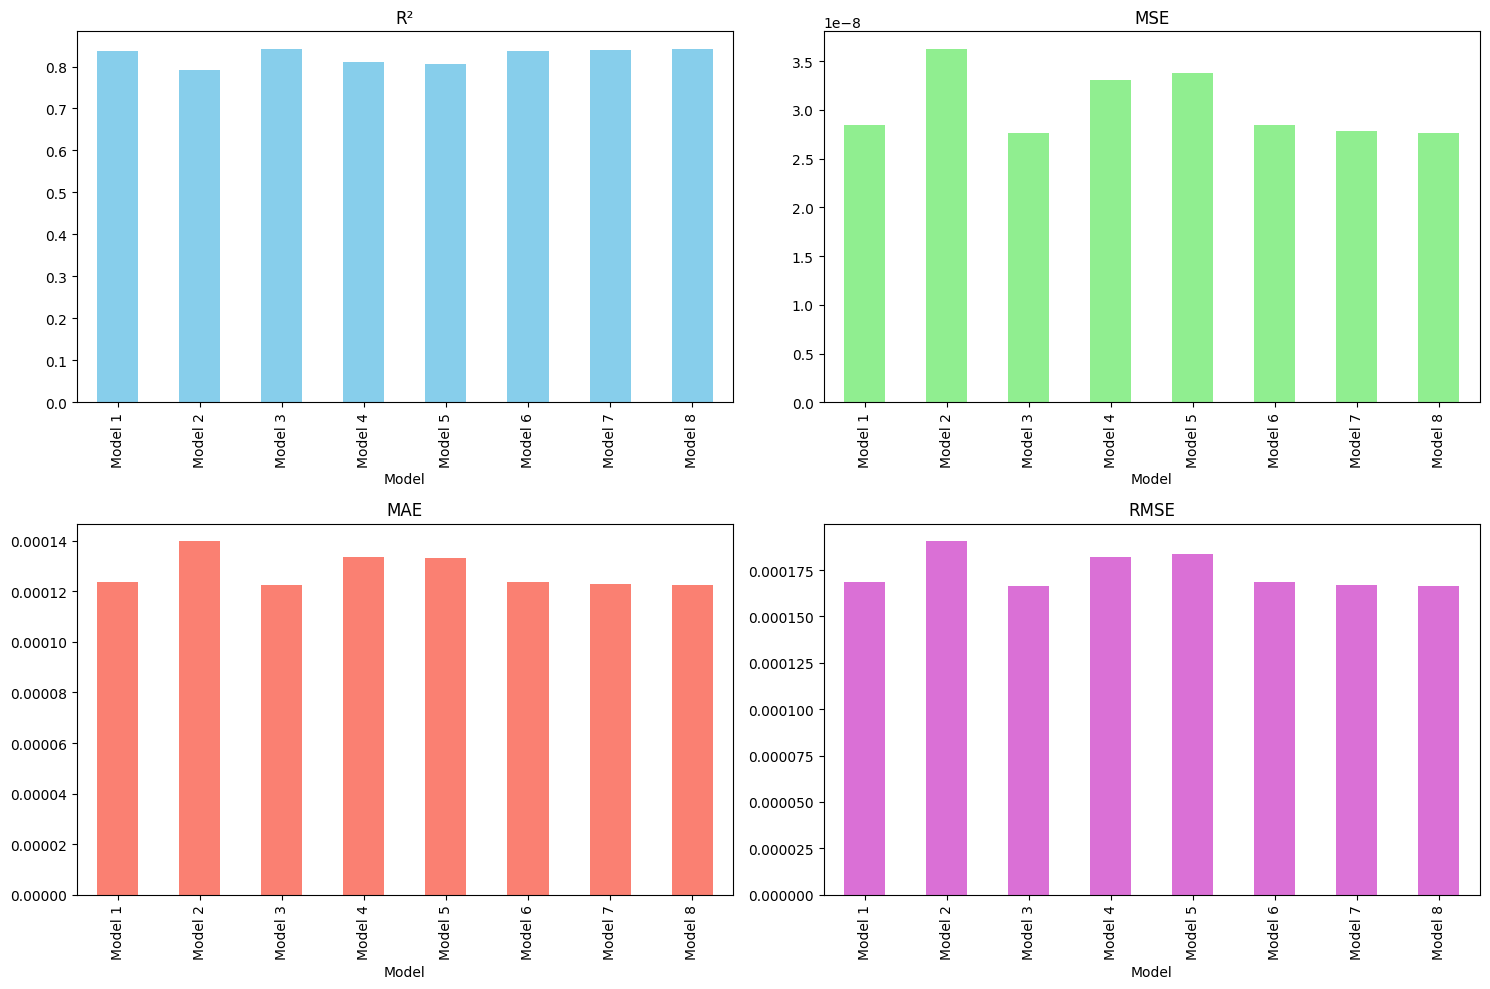

In [60]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico para R²
xgboost_metrics_df.plot(kind='bar', x='Model', y='R-squared (R²)', ax=ax[0, 0], legend=False, color='skyblue')
ax[0, 0].set_title('R²')

# Gráfico para MSE
xgboost_metrics_df.plot(kind='bar', x='Model', y='MSE', ax=ax[0, 1], legend=False, color='lightgreen')
ax[0, 1].set_title('MSE')

# Gráfico para MAE
xgboost_metrics_df.plot(kind='bar', x='Model', y='MAE', ax=ax[1, 0], legend=False, color='salmon')
ax[1, 0].set_title('MAE')

# Gráfico para RMSE
xgboost_metrics_df.plot(kind='bar', x='Model', y='RMSE', ax=ax[1, 1], legend=False, color='orchid')
ax[1, 1].set_title('RMSE')

plt.tight_layout()
plt.show()

In [86]:
print(metrics_df.to_markdown())

|    | Model                                                           |         MSE |         MAE |        RMSE |   R-squared (R²) |
|---:|:----------------------------------------------------------------|------------:|------------:|------------:|-----------------:|
|  0 | Regressão linear                                                | 3.01593e-08 | 0.000129156 | 0.000173664 |         0.827429 |
|  1 | Regressão linear regularizada                                   | 1.07138e-35 | 2.21837e-18 | 3.2732e-18  |         1        |
|  2 | Ridge (alpha=0.2)                                               | 3.04746e-08 | 0.000129643 | 0.00017457  |         0.825625 |
|  3 | Ridge (alpha=1)                                                 | 3.07055e-08 | 0.000130243 | 0.00017523  |         0.824304 |
|  4 | Ridge (alpha=5)                                                 | 3.1031e-08  | 0.000130991 | 0.000176156 |         0.822441 |
|  5 | Model 1 -> n_estimators: 50, max_depth: 4, learning_rat